In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from preprocess_data import confusion_matrix_preprocessed, label_ordered_models
from random import random, choice

In [6]:
models = label_ordered_models()
metric_names = ['acc', 'F1', 'prec', 'rec']

In [7]:
def get_metrics(y_testset, predicted):
    acc=accuracy_score(y_testset,predicted)
    f1=f1_score(y_testset,predicted,average='macro')
    pr=precision_score(y_testset,predicted,average='macro')
    rc=recall_score(y_testset,predicted,average='macro')
    return [acc, f1, pr, rc]

def get_model_metrics():
    models_data = confusion_matrix_preprocessed()
    model_metrics=[]
    for data in models_data:
        y_test=data[0].iloc[:,0]
        predicted=data[0].iloc[:,1]
        metrics = get_metrics(y_test, predicted)
        model_metrics.append(metrics)
    return model_metrics

def plot_model_metrics(model_metrics):
    df = pd.DataFrame(model_metrics, columns=metric_names, index=label_ordered_models())
    df = df.T.stack().reset_index()
    df.columns = ['metric', 'model', 'value']
    sns.set(style="whitegrid")
    plt.figure(figsize=(12,10))
    ax = sns.barplot(y='value', x='metric', hue='model', data=df)

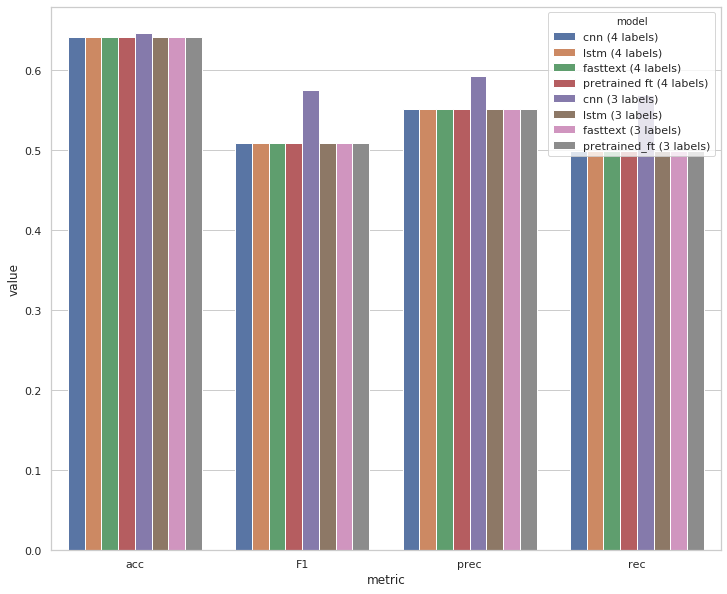

In [8]:
model_metrics=get_model_metrics()
plot_model_metrics(model_metrics)